<a href="https://colab.research.google.com/github/sagawritescode/ERA-V1/blob/main/Assignment7Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Cuda

In [9]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


Transforms

In [10]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

Download Data

In [11]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Load test and train data using dataloader

In [12]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Plot the images

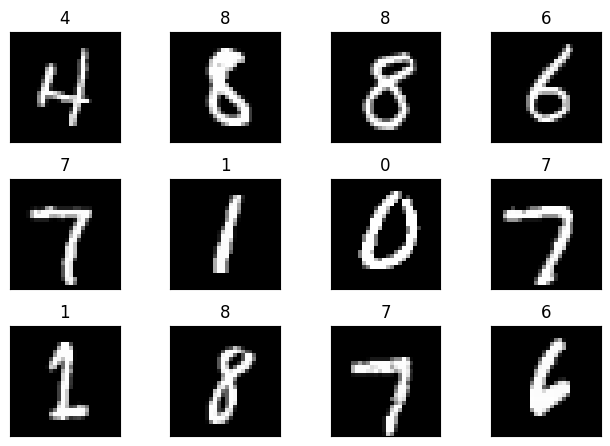

In [13]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

Initialising and summarising model

In [14]:
!pip install torchsummary
from torchsummary import summary
from model import Model2
from utils import train, test

training_model = Model2().to(device)
summary(training_model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
            Conv2d-7           [-1, 64, 22, 22]           8,192
              ReLU-8           [-1, 64, 22, 22]               0
         MaxPool2d-9           [-1, 64, 11, 11]               0
           Conv2d-10            [-1, 128, 9, 9]          73,728
             ReLU-11            [-1, 128, 9, 9]               0
           Conv2d-12            [-1, 256, 7, 7]         294,912
    

In [15]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []


CODE BLOCK: 10

In [16]:
optimizer = optim.SGD(training_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(training_model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(training_model, device, test_loader, criterion, test_acc, test_losses)
  # train(training_model, device, train_loader, optimizer, epoch)
  # test(training_model, device, test_loader)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3022 Batch_id=468 Accuracy=12.09: 100%|██████████| 469/469 [00:23<00:00, 20.13it/s]


Test set: Average loss: 2.3025, Accuracy: 974/10000 (9.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.3002 Batch_id=468 Accuracy=9.75: 100%|██████████| 469/469 [00:24<00:00, 19.41it/s]


Test set: Average loss: 2.3010, Accuracy: 974/10000 (9.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.2897 Batch_id=468 Accuracy=14.44: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]


Test set: Average loss: 2.2930, Accuracy: 1818/10000 (18.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0754 Batch_id=468 Accuracy=80.43: 100%|██████████| 469/469 [00:20<00:00, 22.65it/s]


Test set: Average loss: 0.1354, Accuracy: 9588/10000 (95.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0206 Batch_id=468 Accuracy=96.72: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]


Test set: Average loss: 0.0704, Accuracy: 9786/10000 (97.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0109 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:20<00:00, 23.19it/s]


Test set: Average loss: 0.0485, Accuracy: 9852/10000 (98.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.0499 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:20<00:00, 23.42it/s]


Test set: Average loss: 0.0420, Accuracy: 9864/10000 (98.64%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0051 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:23<00:00, 20.32it/s]


Test set: Average loss: 0.0409, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0734 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]


Test set: Average loss: 0.0371, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0027 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:21<00:00, 21.93it/s]


Test set: Average loss: 0.0363, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0021 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:20<00:00, 22.94it/s]


Test set: Average loss: 0.0360, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0573 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:19<00:00, 23.97it/s]


Test set: Average loss: 0.0378, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0123 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:20<00:00, 22.94it/s]


Test set: Average loss: 0.0354, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0726 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:21<00:00, 22.02it/s]


Test set: Average loss: 0.0353, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.0057 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:22<00:00, 20.74it/s]


Test set: Average loss: 0.0350, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-04.


CODE BLOCK: 11

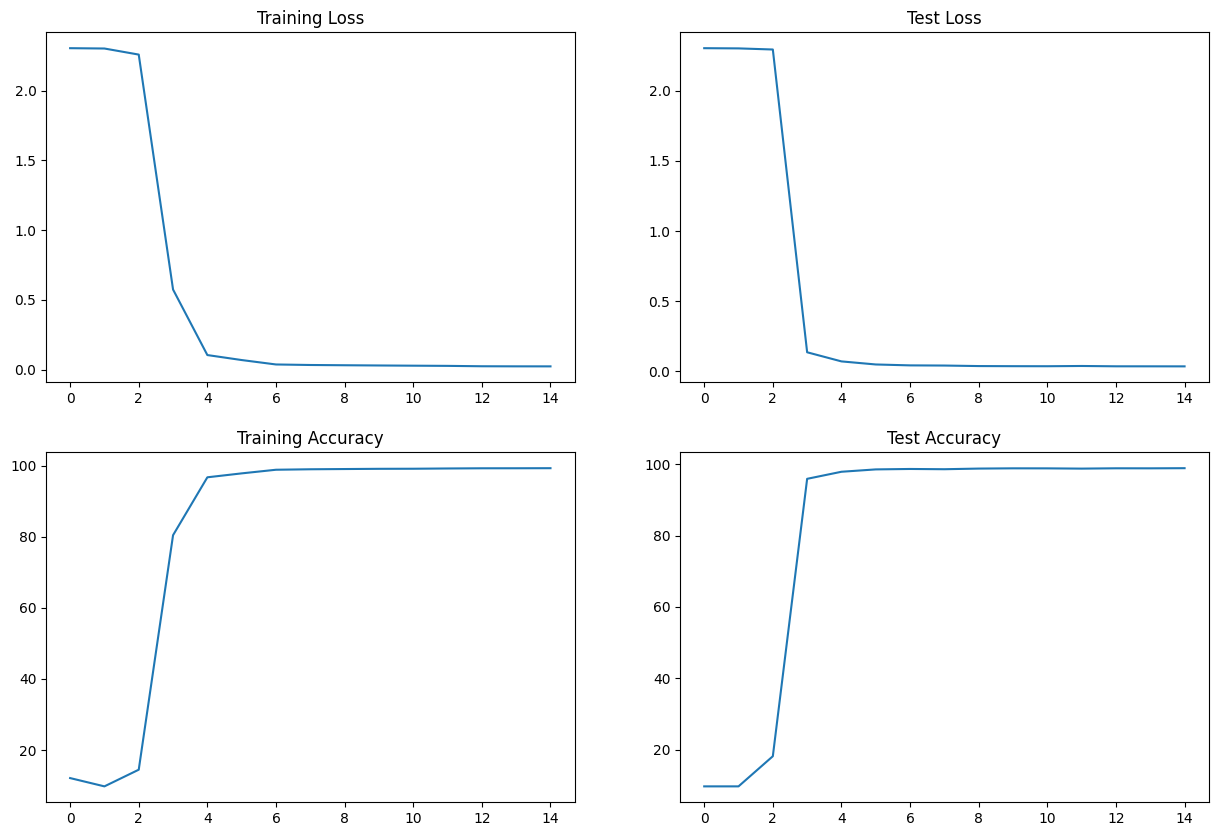

In [17]:
from utils import plot_loss_and_accuracy
plot_loss_and_accuracy(train_losses, train_acc, test_losses, test_acc)